In [1]:
#importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.metrics import mean_squared_error,r2_score,classification_report,confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
df = pd.read_csv('customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

### Extracting the 5th column and storing it in ‘customer_5’

In [6]:
customer_5 = df.iloc[:,4]
customer_5 = df['Dependents']

### Extracting the 15th column and storing it in ‘customer_15’

In [7]:
customer_15 = df.iloc[:,14]

In [8]:
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

### Extracting all the male senior citizens whose payment method is electronic check and storing the result in ‘senior_male_electronic’


In [9]:
#df[(df['gender']=='Male') & (df['SeniorCitizen']==1) & (df['PaymentMethod']=='Electronic check') ]
senior_male_electronic = df[(df['gender']=='Male') & (df['SeniorCitizen']==1) & (df['PaymentMethod']=='Electronic check') ]

### Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in ‘customer_total_tenure’


In [10]:
customer_total_tenure = df[(df['tenure']>70) | (df['MonthlyCharges']>100) ]

### Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’


In [11]:
two_mail_yes = df[(df['Contract']=='Two year') & (df['PaymentMethod']== 'Mailed check') & (df['Churn']== 'Yes') ]

### Extract 333 random records from the customer_churn dataframe and store the result in ‘customer_333’

In [12]:
customer_333 = df.sample(333,random_state=24)

### Get the count of different levels from the ‘Churn’ column

In [13]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [14]:
# We can see that the data is not biased.

### Build a bar-plot for the ’InternetService’ column

In [15]:
Count = df['InternetService'].value_counts()

Text(0.5, 1.0, 'Distribution of Internet Service')

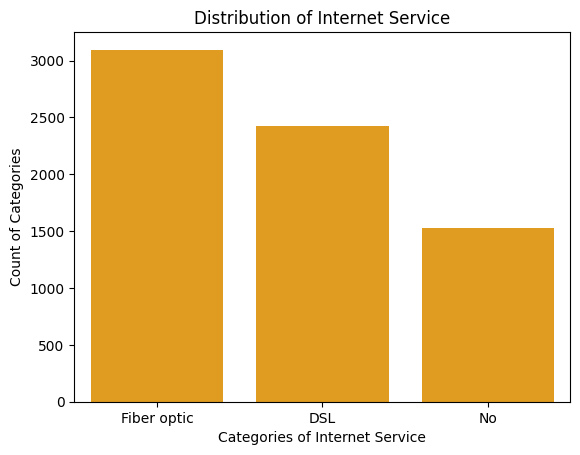

In [16]:
sns.barplot(x=Count.index, y=Count,color = 'Orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')

### Build a histogram for the ‘tenure’ column: 
i. Set the number of bins to be 30
ii. Set the color of the bins to be ‘green’
iii. Assign the title ‘Distribution of tenure’

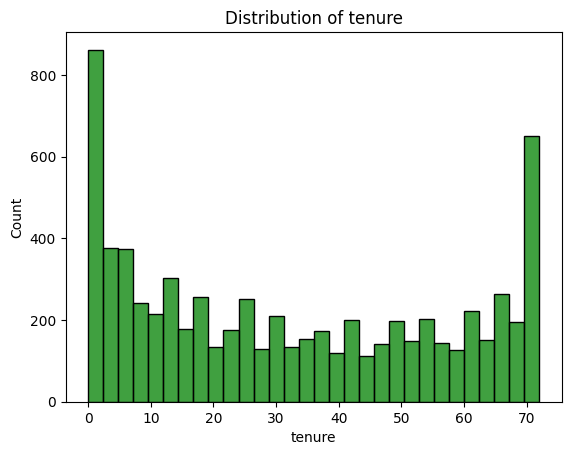

In [17]:
sns.histplot(df["tenure"],color="green",bins=30)
plt.title("Distribution of tenure")
plt.show()

### Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to the yaxis & ‘tenure’ to the ‘x-axis’:
i. Assign the points a color of ‘brown’
ii. Set the x-axis label to ‘Tenure of customer’
iii. Set the y-axis label to ‘Monthly Charges of customer’
iv. Set the title to ‘Tenure vs Monthly Charges’

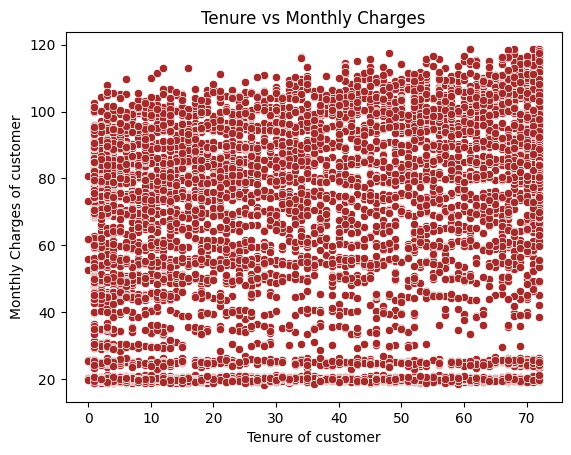

In [18]:
sns.scatterplot(x=df["tenure"],y=df["MonthlyCharges"],color="brown")
plt.xlabel("Tenure of customer")
plt.ylabel("Monthly Charges of customer")
plt.title("Tenure vs Monthly Charges")
plt.show()

### d. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis.

<AxesSubplot: xlabel='Contract', ylabel='tenure'>

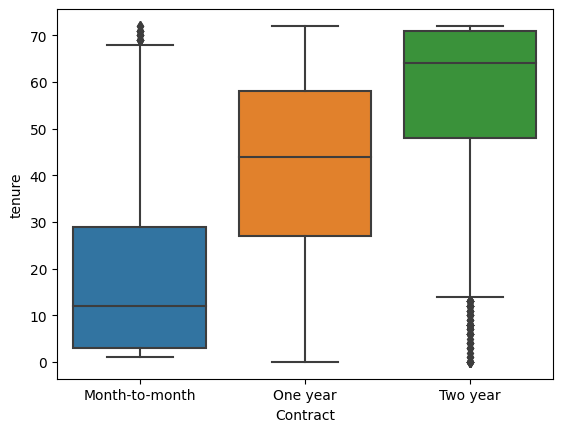

In [19]:
sns.boxplot(x=df["Contract"],y=df["tenure"])

### Linear Regression: 
#### a. Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’
i. Divide the dataset into train and test sets in 70:30 ratio.
ii. Build the model on train set and predict the values on test set
iii. After predicting the values, find the root mean square error
iv. Find out the error in prediction & store the result in ‘error’
v. Find the root mean square error

In [20]:
x_lr = df[['tenure']]
y_lr = df['MonthlyCharges']

In [21]:
x_train ,x_test,y_train,y_test=train_test_split(x_lr,y_lr,test_size=0.30,random_state=1)


In [22]:
lr_model = LinearRegression()

In [23]:
#Training the model
lr_model.fit(x_train,y_train)

LinearRegression()

In [24]:
#Testing the model
y_pred_lr = lr_model.predict(x_test)

In [25]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
rmse

29.15550989402921

In [26]:
r2 = r2_score(y_test,y_pred_lr)
r2

0.05563865568825355

In [27]:
error = y_test - y_pred_lr

In [28]:
error

3381    12.334672
6180    27.132562
4829   -13.522880
3737    -5.752289
4249     7.997289
          ...    
3934   -17.652711
1351   -37.762796
2048    35.486360
6218   -18.107775
4297     4.794335
Name: MonthlyCharges, Length: 2113, dtype: float64

### Logistic Regression:
#### a. Build a simple logistic regression model where dependent variable is ‘Churn’ & independent variable is ‘MonthlyCharges’
i. Divide the dataset in 65:35 ratio
ii. Build the model on train set and predict the values on test set
iii. Build the confusion matrix and get the accuracy score

In [29]:
x_log = df[['MonthlyCharges']]
y_log = df[['Churn']]

In [30]:
x_train_log ,x_test_log,y_train_log,y_test_log=train_test_split(x_log,y_log,test_size=0.35,random_state=2)

In [31]:
log_model = LogisticRegression()

In [32]:
log_model.fit(x_train_log,y_train_log)

C:\Users\tarun\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [33]:
y_pred_log = log_model.predict(x_test_log)

In [34]:
# Construct the confusion matrix
conf_matrix = confusion_matrix(y_test_log, y_pred_log)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1832    0]
 [ 634    0]]


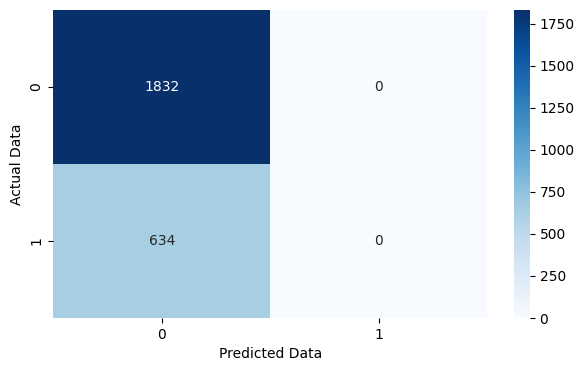

In [35]:
plt.figure(figsize = (7, 4))
sns.heatmap(conf_matrix, annot = True, cmap = "Blues",fmt='g')
plt.xlabel("Predicted Data")
plt.ylabel("Actual Data");

In [36]:
#This shows that the data is skewed towards the 0 Label class

In [37]:
accuracy = accuracy_score(y_test_log, y_pred_log)
print("\nAccuracy Score:", accuracy)


Accuracy Score: 0.7429034874290349


In [38]:
#y_log.value_counts()

#### b. Build a multiple logistic regression model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ & ‘MonthlyCharges’
i. Divide the dataset in 80:20 ratio
ii. Build the model on train set and predict the values on test set
iii. Build the confusion matrix and get the accuracy score

In [39]:
x_log_mul = df[['MonthlyCharges','tenure']]
y_log_mul = df[['Churn']]

In [40]:
x_train_log_mul ,x_test_log_mul,y_train_log_mul,y_test_log_mul=train_test_split(x_log_mul,y_log_mul,test_size=0.20,random_state=3)

In [41]:
log_model_mul = LogisticRegression()

In [42]:
log_model_mul.fit(x_train_log_mul,y_train_log_mul)

C:\Users\tarun\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [43]:
y_pred_log_mul=log_model_mul.predict(x_test_log_mul)

In [44]:
# Construct the confusion matrix
conf_matrix_mul = confusion_matrix(y_test_log_mul, y_pred_log_mul)
print("Confusion Matrix:")
print(conf_matrix_mul)

Confusion Matrix:
[[965  81]
 [203 160]]


In [45]:
accuracy = accuracy_score(y_test_log_mul, y_pred_log_mul)
print("\nAccuracy Score:", accuracy)


Accuracy Score: 0.7984386089425124


### E) Decision Tree:
#### a. Build a decision tree model where dependent variable is ‘Churn’ & independent variable is ‘tenure’
i. Divide the dataset in 80:20 ratio
ii. Build the model on train set and predict the values on test set
iii. Build the confusion matrix and calculate the accuracy

In [46]:
x_dt = df[['tenure']]
y_dt = df[['Churn']]

In [47]:
x_train_dt ,x_test_dt,y_train_dt,y_test_dt=train_test_split(x_dt,y_dt,test_size=20,random_state=4)

In [48]:
dt_model = DecisionTreeClassifier()

In [49]:
dt_model.fit(x_train_dt,y_train_dt)

DecisionTreeClassifier()

In [50]:
y_pred_dt = dt_model.predict(x_test_dt)

In [51]:
conf_matrix_dt = confusion_matrix(y_test_dt, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)

Confusion Matrix:
[[14  2]
 [ 4  0]]


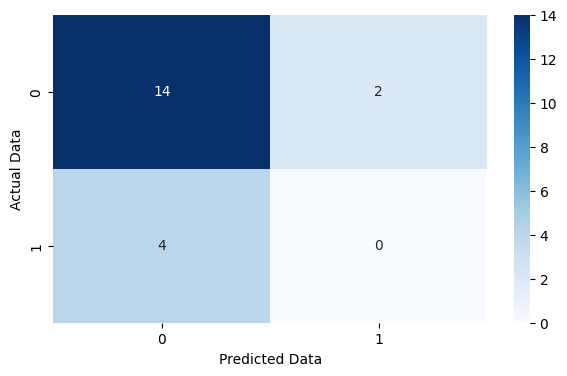

In [52]:
plt.figure(figsize = (7, 4))
sns.heatmap(conf_matrix_dt, annot = True, cmap = "Blues",fmt='g')
plt.xlabel("Predicted Data")
plt.ylabel("Actual Data");

In [53]:
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print("\nAccuracy Score of a Decision Tree Model:", accuracy_dt)


Accuracy Score of a Decision Tree Model: 0.7


### F) Random Forest:
#### a. Build a Random Forest model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ and ‘MonthlyCharges’
i. Divide the dataset in 70:30 ratio
ii. Build the model on train set and predict the values on test set
iii. Build the confusion matrix and calculate the accuracy

In [54]:
x_rf = df[['tenure','MonthlyCharges']]
y_rf = df[['Churn']]

In [59]:
x_train_rf ,x_test_rf,y_train_rf,y_test_rf=train_test_split(x_rf,y_rf,test_size=30,random_state=5)

In [60]:
rf_model = RandomForestClassifier()

In [61]:
rf_model.fit(x_train_rf,y_train_rf)

C:\Users\tarun\AppData\Local\Temp\ipykernel_5160\3199109224.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train_rf,y_train_rf)


RandomForestClassifier()

In [62]:
y_pred_rf = rf_model.predict(x_test_rf)

In [63]:
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

Confusion Matrix:
[[18  2]
 [ 8  2]]


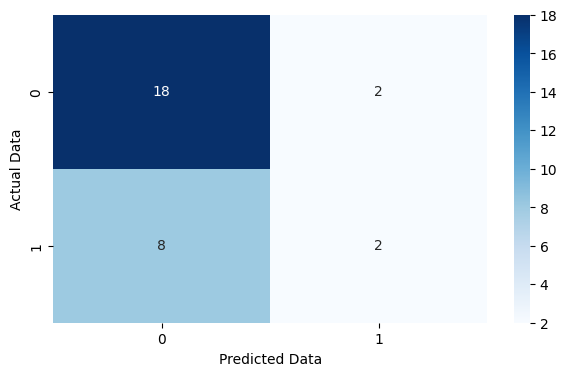

In [64]:
plt.figure(figsize = (7, 4))
sns.heatmap(conf_matrix_rf, annot = True, cmap = "Blues",fmt='g')
plt.xlabel("Predicted Data")
plt.ylabel("Actual Data");

In [65]:
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print("\nAccuracy Score of a Decision Tree Model:", accuracy_rf)


Accuracy Score of a Decision Tree Model: 0.6666666666666666
